# **Machine Learning**
## *Lab 03*

In [19]:
import pandas as pd
import numpy as np
import statistics
import seaborn as sns
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle

In [20]:
dataset = pd.read_csv("combined_seismic_data.csv")
dataset = dataset.dropna()

def create_intensity_classes(df):
    # Define thresholds based on percentiles or domain knowledge
    low_threshold = df['max'].quantile(0.33)
    high_threshold = df['max'].quantile(0.66)
    
    # Create class labels
    conditions = [
        (df['max'] < low_threshold),
        (df['max'] >= low_threshold) & (df['max'] < high_threshold),
        (df['max'] >= high_threshold)
    ]
    class_labels = [0, 1, 2]  # or ['Low', 'Medium', 'High']
    
    return np.select(conditions, class_labels)
data = dataset.copy()
data = data[['max', 'distance_to_event']]
data["class"] = create_intensity_classes(data)

### A1

In [21]:
X = data[['max', 'distance_to_event']].values
y = data['class'].values 

class_0_data = X[y == 0]
class_1_data = X[y == 1]
class_2_data = X[y == 2]

# Calculate the mean (centroid) for each class
centroid_0 = np.mean(class_0_data, axis=0)
centroid_1 = np.mean(class_1_data, axis=0)
centroid_2 = np.mean(class_2_data, axis=0)

# Calculate the standard deviation (spread) for each class
spread_0 = np.std(class_0_data, axis=0)
spread_1 = np.std(class_1_data, axis=0)
spread_2 = np.std(class_2_data, axis=0)

# Calculate the Euclidean distance between the centroids
distance_between_centroids_0_1 = np.linalg.norm(centroid_0 - centroid_1)
distance_between_centroids_0_2 = np.linalg.norm(centroid_0 - centroid_1)
distance_between_centroids_1_2 = np.linalg.norm(centroid_1 - centroid_2)

# Print the results
print("Centroid for Class 0:", centroid_0)
print("Centroid for Class 1:", centroid_1)
print("Centroid for Class 2:", centroid_2)
print("Spread for Class 0:", spread_0)
print("Spread for Class 1:", spread_1)
print("Spread for Class 2:", spread_2)
print("Distance between Class 0 and Class 1 centroids:", distance_between_centroids_0_1)
print("Distance between Class 0 and Class 2 centroids:", distance_between_centroids_0_2)
print("Distance between Class 1 and Class 2 centroids:", distance_between_centroids_1_2)

Centroid for Class 0: [6666.17784702   14.29194371]
Centroid for Class 1: [2.69243960e+05 1.26714797e+01]
Centroid for Class 2: [6.49747856e+06 1.08977973e+01]
Spread for Class 0: [6.51849028e+03 2.97896721e+00]
Spread for Class 1: [1.77047229e+05 5.10299119e+00]
Spread for Class 2: [8.31579191e+06 5.59578540e+00]
Distance between Class 0 and Class 1 centroids: 262577.78250878665
Distance between Class 0 and Class 2 centroids: 262577.78250878665
Distance between Class 1 and Class 2 centroids: 6228234.598904195


In [22]:
class_0_data

array([[5.80779658e+03, 1.47341397e+01],
       [5.10533372e+03, 1.47341397e+01],
       [3.22441398e+03, 1.47341397e+01],
       [1.60803555e+03, 1.47341397e+01],
       [9.80702875e+03, 1.56404196e+01],
       [8.38523342e+03, 1.56404196e+01],
       [5.39122759e+03, 1.56404196e+01],
       [2.71848504e+03, 1.56404196e+01],
       [3.44839909e+03, 1.56404196e+01],
       [2.22987965e+04, 1.47341397e+01],
       [1.41045011e+04, 1.47341397e+01],
       [5.95391867e+03, 1.47341397e+01],
       [1.34311204e+04, 1.43338615e+01],
       [1.12426072e+04, 1.43338615e+01],
       [7.11826624e+03, 1.43338615e+01],
       [2.88770390e+03, 1.43338615e+01],
       [3.97832918e+03, 1.40372632e+01],
       [3.51286481e+03, 1.40372632e+01],
       [2.34992660e+03, 1.40372632e+01],
       [1.18175449e+03, 1.40372632e+01],
       [8.73444249e+03, 1.57652859e+01],
       [7.29357257e+03, 1.57652859e+01],
       [4.87396859e+03, 1.57652859e+01],
       [1.93138599e+03, 1.57652859e+01],
       [3.569022

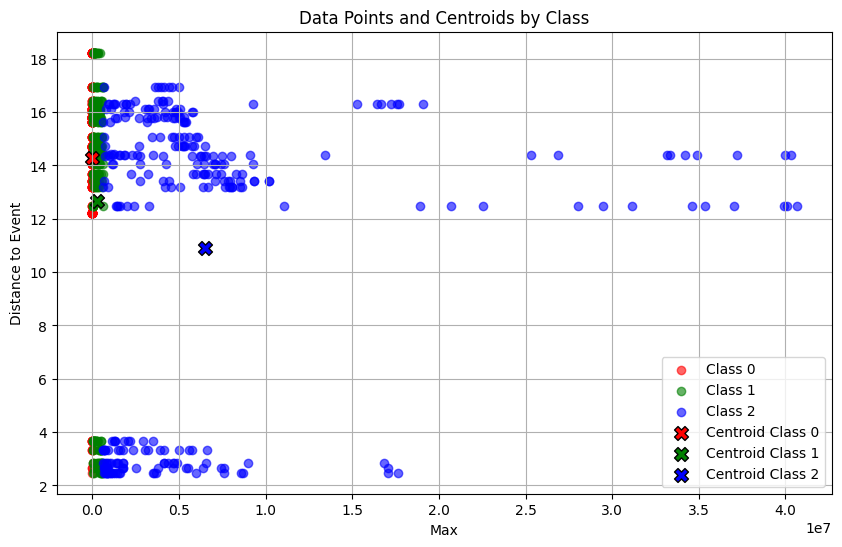

In [23]:
classes = np.unique(y)

# Define colors for each class
colors = ['r', 'g', 'b']

# Plot the data points
plt.figure(figsize=(10, 6))
for i, class_label in enumerate(classes):
    class_data = X[y == class_label]
    plt.scatter(class_data[:, 0], class_data[:, 1], color=colors[i], label=f'Class {class_label}', alpha=0.6)

# Plot the centroids
for i, class_label in enumerate(classes):
    class_data = X[y == class_label]
    centroid = np.mean(class_data, axis=0)
    plt.scatter(centroid[0], centroid[1], color=colors[i], marker='X', s=100, edgecolor='black', label=f'Centroid Class {class_label}')

# Labels and title
plt.xlabel('Max')
plt.ylabel('Distance to Event')
plt.title('Data Points and Centroids by Class')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

### A2

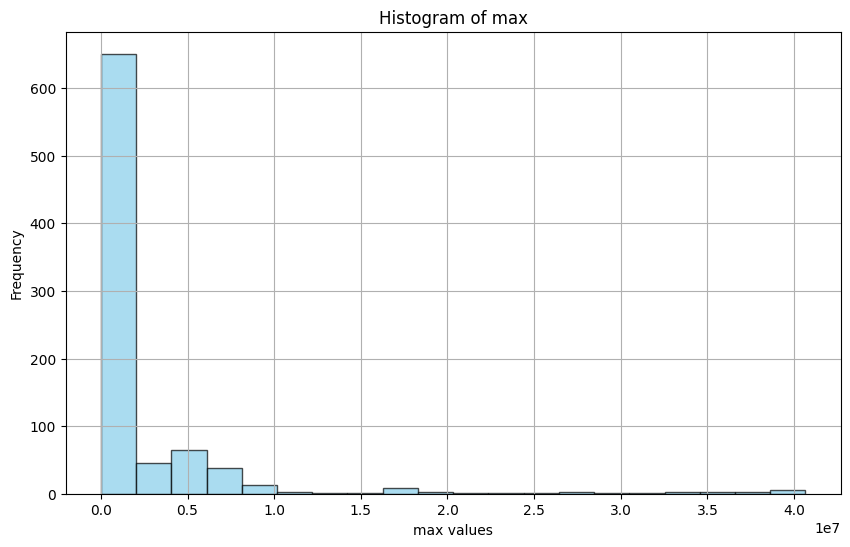

Mean of max: 2297793.2355669336
Variance of max: 32578106536030.68


In [24]:
feature = 'max'
data = dataset[feature].values  # Extract the feature data

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(data, bins=20, color='skyblue', edgecolor='black', alpha=0.7)  # 20 bins for histogram
plt.title(f'Histogram of {feature}')
plt.xlabel(f'{feature} values')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Calculate the mean and variance
mean_value = np.mean(data)
variance_value = np.var(data)

print(f"Mean of {feature}: {mean_value}")
print(f"Variance of {feature}: {variance_value}")


### A3

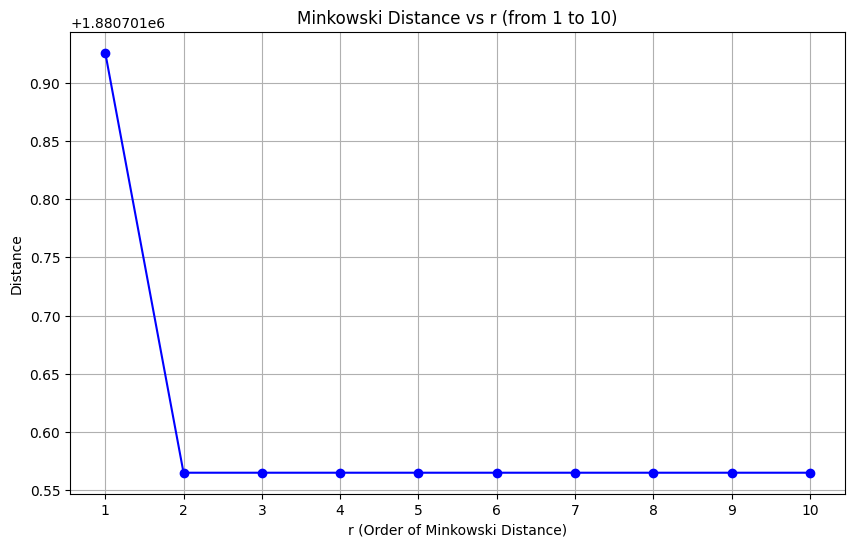

Minkowski distance (r=1): 1880701.9259737087
Minkowski distance (r=2): 1880701.5648128015
Minkowski distance (r=3): 1880701.5648127652
Minkowski distance (r=4): 1880701.5648127669
Minkowski distance (r=5): 1880701.5648127685
Minkowski distance (r=6): 1880701.5648127652
Minkowski distance (r=7): 1880701.5648127652
Minkowski distance (r=8): 1880701.5648127669
Minkowski distance (r=9): 1880701.5648127652
Minkowski distance (r=10): 1880701.5648127683


In [25]:
# Choose two feature vectors 
vec1 = dataset[['max', 'distance_to_event']].iloc[1].values 
vec2 = dataset[['max', 'distance_to_event']].iloc[50].values  

# Function to compute Minkowski distance
def minkowski_distance(vec1, vec2, r):
    return np.sum(np.abs(vec1 - vec2) ** r) ** (1/r)

# List to store the distances
distances = []

# Calculate Minkowski distance for r from 1 to 10
for r in range(1, 11):
    distance = minkowski_distance(vec1, vec2, r)
    distances.append(distance)

# Plotting the Minkowski distances
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), distances, marker='o', linestyle='-', color='b')
plt.title('Minkowski Distance vs r (from 1 to 10)')
plt.xlabel('r (Order of Minkowski Distance)')
plt.ylabel('Distance')
plt.grid(True)
plt.xticks(range(1, 11))
plt.show()

# Print distances for reference
for r, distance in zip(range(1, 11), distances):
    print(f"Minkowski distance (r={r}): {distance}")


### A4

In [26]:
data = dataset.copy()
data["class"] = create_intensity_classes(data)

class_1_and_2 = data[data['class'].isin([1, 2])]

# Extract features and labels again after filtering
X = class_1_and_2[['max', 'distance_to_event']].values
y = class_1_and_2['class'].values

# Split the data into training and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Check the shapes of the resulting datasets
print("Training features shape:", X_train.shape)
print("Test features shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Test labels shape:", y_test.shape)

Training features shape: (397, 2)
Test features shape: (171, 2)
Training labels shape: (397,)
Test labels shape: (171,)


### A5

In [27]:
k=3
neigh = KNeighborsClassifier(n_neighbors=k)
neigh.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

### A6

In [28]:
neigh.score(X_test,y_test)

0.9941520467836257

### A7

In [29]:
i = int(random.random()*X_test.shape[0])
test_vect = X_test[i] 

predicted_class = neigh.predict([test_vect])

# Output the predicted class and the actual class
print(f"Test vector {i}: {test_vect}")
print(f"Predicted class: {predicted_class[0]}")
print(f"Actual class: {y_test[i]}")

Test vector 163: [5.33177272e+05 1.69400893e+01]
Predicted class: 1
Actual class: 1


### A8

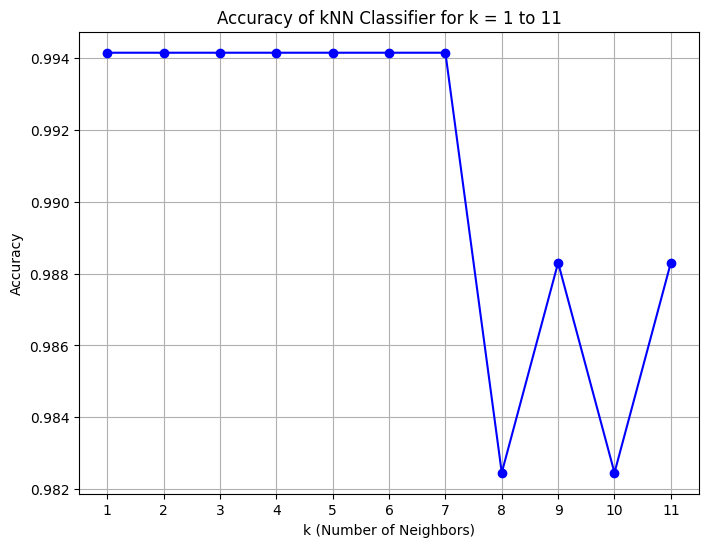

In [30]:
accuracies = []

# Train kNN classifiers for k = 1 to k = 11
for k in range(1, 12):
    knn = KNeighborsClassifier(n_neighbors=k)  # Initialize classifier with k
    knn.fit(X_train, y_train)  # Train the classifier
    y_pred = knn.predict(X_test)  # Predict on the test set
    accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
    accuracies.append(accuracy)  # Store the accuracy

# Plot the accuracy for different values of k
plt.figure(figsize=(8, 6))
plt.plot(range(1, 12), accuracies, marker='o', linestyle='-', color='b')
plt.title('Accuracy of kNN Classifier for k = 1 to 11')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.xticks(range(1, 12))
plt.grid(True)
plt.show()

### A9

In [31]:
filename = "Lab03_KNN.pkl"
pickle.dump(neigh, open(filename, 'wb'))
# Make predictions on the training and test sets
y_train_pred = neigh.predict(X_train)
y_test_pred = neigh.predict(X_test)

# Confusion Matrix for both training and test sets
train_confusion_matrix = confusion_matrix(y_train, y_train_pred)
test_confusion_matrix = confusion_matrix(y_test, y_test_pred)

# Print confusion matrices
print("Training Confusion Matrix:")
print(train_confusion_matrix)
print("\nTest Confusion Matrix:")
print(test_confusion_matrix)

print("\nTraining Classification Report:")
print(classification_report(y_train, y_train_pred))
print("\nTest Classification Report:")
print(classification_report(y_test, y_test_pred))

Training Confusion Matrix:
[[200   0]
 [  0 197]]

Test Confusion Matrix:
[[80  0]
 [ 1 90]]

Training Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       200
           2       1.00      1.00      1.00       197

    accuracy                           1.00       397
   macro avg       1.00      1.00      1.00       397
weighted avg       1.00      1.00      1.00       397


Test Classification Report:
              precision    recall  f1-score   support

           1       0.99      1.00      0.99        80
           2       1.00      0.99      0.99        91

    accuracy                           0.99       171
   macro avg       0.99      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171



Given that the model performs almost perfectly on both the training and test data, with only a very small drop in performance on the test set, the model is most likely regular-fit (well-generalized).

It is not underfitting because the model is achieving near-perfect results on both training and test data. It is also not overfitting because the performance drop from training to test data is minimal and within acceptable ranges.